# Visualizing Earnings Based On College Majors  

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. 

In first, let's import nessesery libraries. 

In [2]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
recent_grads = pd.read_csv(r'...\recent-grads.csv') 

In [4]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. 

### **Here are some of the columns in the dataset**:  

**Rank** - Rank by median earnings (the dataset is ordered by this column).  
**Major_code** - Major code.  
**Major** - Major description.  
**Major_category** - Category of major.  
**Total** - Total number of people with major.  
**Sample_size** - Sample size (unweighted) of full-time.  
**Men** - Male graduates.  
**Women** - Female graduates.  
**ShareWomen** - Women as share of total.  
**Employed** - Number employed.  
**Median** - Median salary of full-time, year-round workers.  
**Low_wage_jobs** - Number in low-wage service jobs.  
**Full_time** - Number employed 35 hours or more.  
**Part_time** - Number employed less than 35 hours.  

In [8]:
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


Let's see on summary statistics for all of the numeric columns

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.shape

(173, 21)

Cleaning data from missing values

In [4]:
recent_grads = recent_grads.dropna()
recent_grads.shape

(172, 21)

As we can see there was only one row with missing value.   
Start to visualize

Let's Generate scatter plots in cells to explore the following relations:  
- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

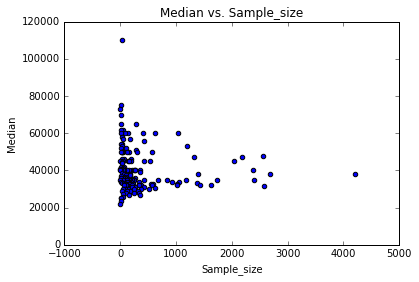

In [12]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size')

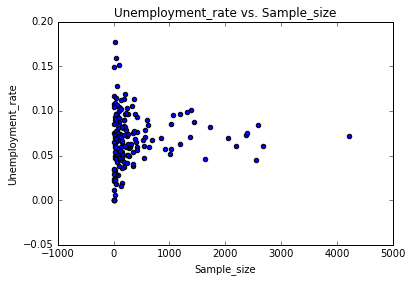

In [13]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment_rate vs. Sample_size')

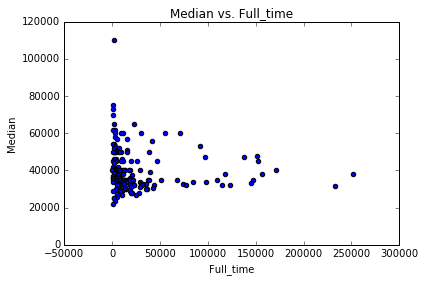

In [15]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median vs. Full_time')

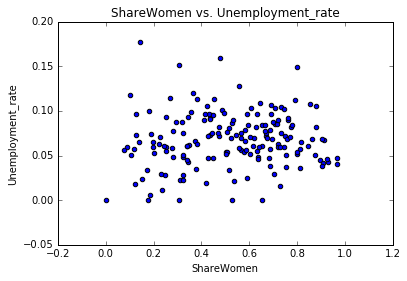

In [16]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs. Unemployment_rate')

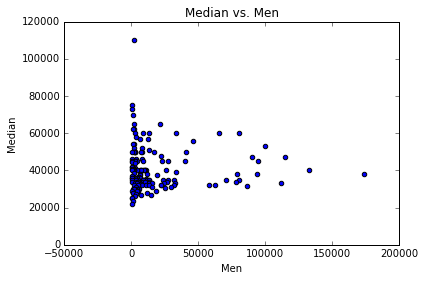

In [17]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Median vs. Men')

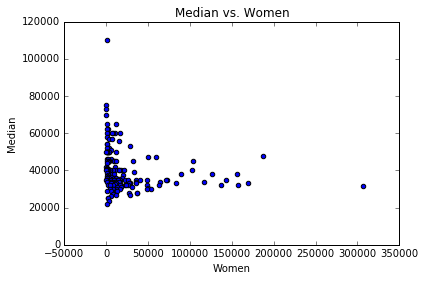

In [18]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Median vs. Women')

From plots above we can make next conclusions:  

- people who have the highest salary stadied not on most popular majors. 
- there is no any ralationship between full-time emploees and median salary as well as median salary and ShareWomen.  
- for popular specialties, the unemployment rate is relatively constant, whereas for unpopular specialties it can be as very low, or very high or medium.

Let's generate histograms to explore the distributions of the same columns

C:\Users\tretyakova_v\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\tretyakova_v\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


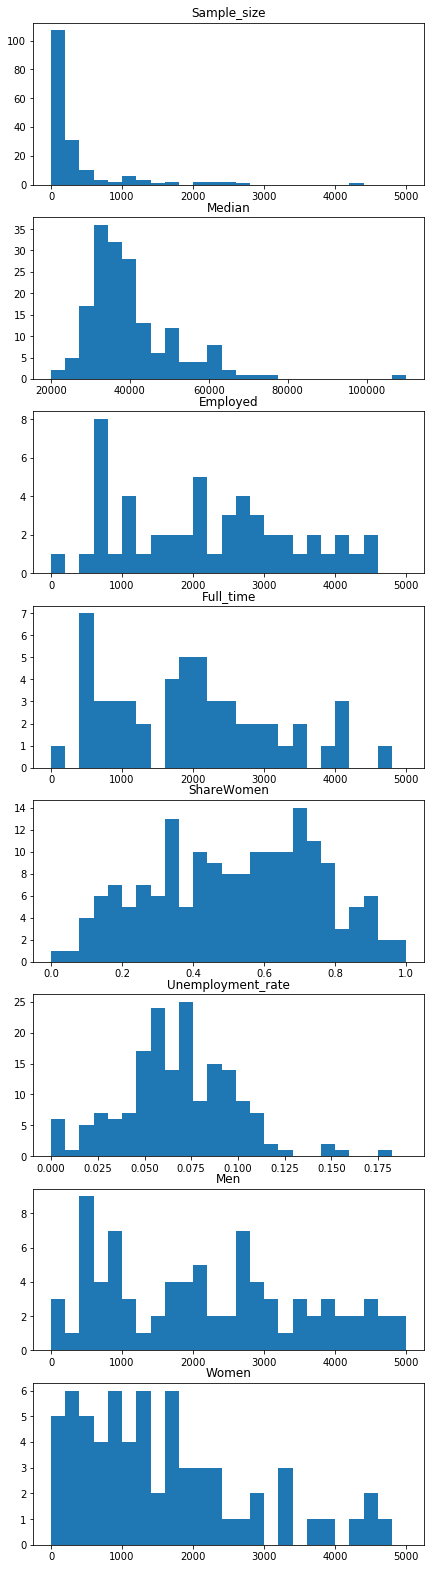

In [8]:
fig = plt.figure(figsize=(7,28))
ax1 = fig.add_subplot(8,1,1)
ax2 = fig.add_subplot(8,1,2)
ax3 = fig.add_subplot(8,1,3)
ax4 = fig.add_subplot(8,1,4)
ax5 = fig.add_subplot(8,1,5)
ax6 = fig.add_subplot(8,1,6)
ax7 = fig.add_subplot(8,1,7)
ax8 = fig.add_subplot(8,1,8)

ax1.hist(recent_grads['Sample_size'], bins=25, range=(0,5000))
ax1.set_title('Sample_size')

ax2.hist(recent_grads['Median'], bins=25, range=(20000,110000))
ax2.set_title('Median')

ax3.hist(recent_grads['Employed'], bins=25, range=(0,5000))
ax3.set_title('Employed')

ax4.hist(recent_grads['Full_time'], bins=25, range=(0,5000))
ax4.set_title('Full_time')

ax5.hist(recent_grads['ShareWomen'], bins=25, range=(0,1.0))
ax5.set_title('ShareWomen')

ax6.hist(recent_grads['Unemployment_rate'], bins=25, range=(0,0.19))
ax6.set_title('Unemployment_rate')

ax7.hist(recent_grads['Men'], bins=25, range=(0,5000))
ax7.set_title('Men')

ax8.hist(recent_grads['Women'], bins=25, range=(0,5000))
ax8.set_title('Women')

plt.show()

Let't plot scatter matrix to better understanding relationship between values

In [9]:
from pandas.tools.plotting import scatter_matrix

C:\Users\tretyakova_v\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA0714668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA127F128>]], dtype=object)

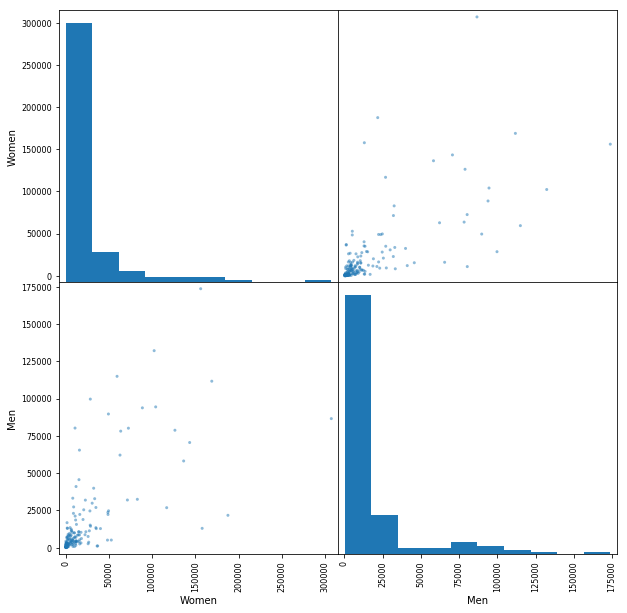

In [10]:
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

C:\Users\tretyakova_v\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA1340CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA1B6EAC8>]], dtype=object)

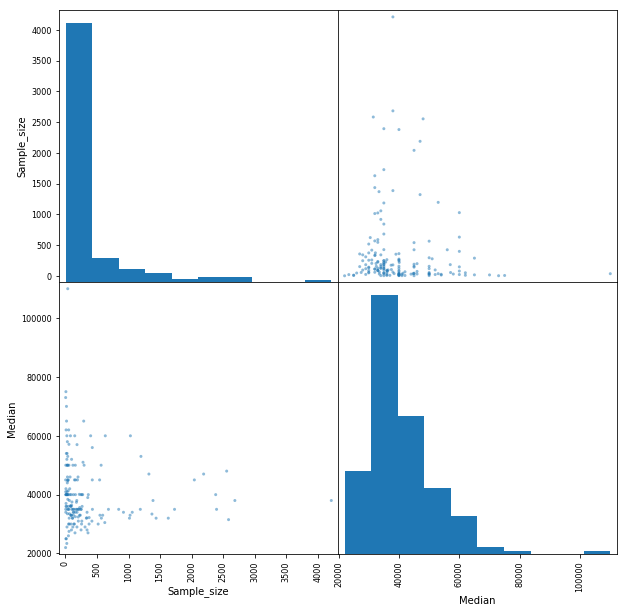

In [11]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

C:\Users\tretyakova_v\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA1CAF320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020CA21B4A58>]], dtype=object)

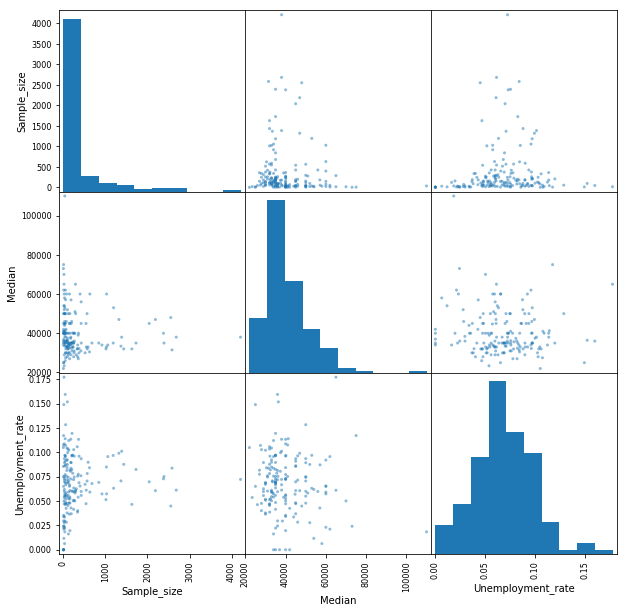

In [12]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

As we can see there is no clear relationship between values on plots above

Let's use bar plots to compare the percentages of women from the 10 highest paying majors and from the 10 lowest paying majors

In [13]:
sort_sharewomen = recent_grads['Major'].sort_index()
sort_sharewomen.head(10)

0                        PETROLEUM ENGINEERING
1               MINING AND MINERAL ENGINEERING
2                    METALLURGICAL ENGINEERING
3    NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                         CHEMICAL ENGINEERING
5                          NUCLEAR ENGINEERING
6                            ACTUARIAL SCIENCE
7                   ASTRONOMY AND ASTROPHYSICS
8                       MECHANICAL ENGINEERING
9                       ELECTRICAL ENGINEERING
Name: Major, dtype: object

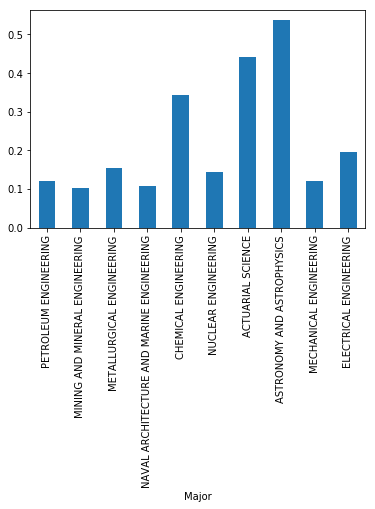

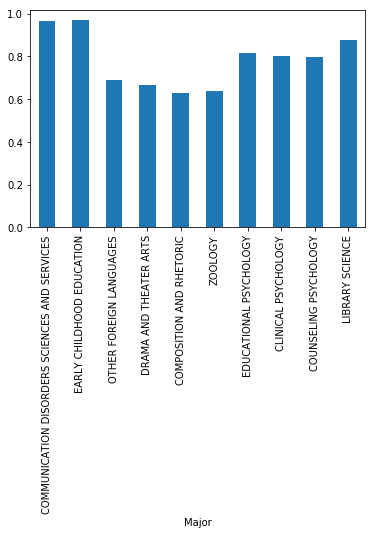

In [14]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen',legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)


Now we'll use bar plots to compare unemployment rate for 10 highes and lowest paying majors

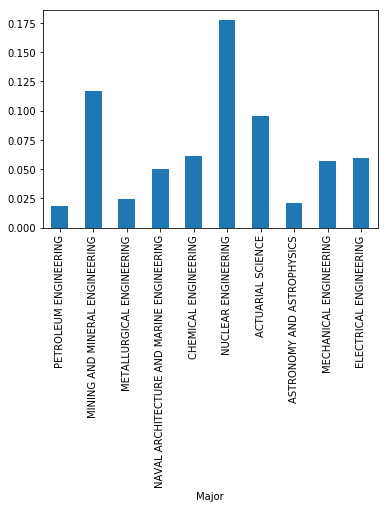

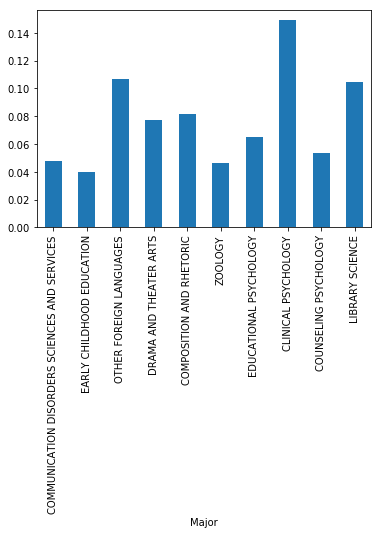

In [15]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate',legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

Let's use a grouped bar plot to compare the number of men with the number of women in each category of majors.

In [6]:
major_list = recent_grads['Major'].tolist()
major_list[:5]

['PETROLEUM ENGINEERING',
 'MINING AND MINERAL ENGINEERING',
 'METALLURGICAL ENGINEERING',
 'NAVAL ARCHITECTURE AND MARINE ENGINEERING',
 'CHEMICAL ENGINEERING']

In first make compare for first 10 spesialisations

In [7]:
major_list10 = major_list[:10]

In [10]:
from numpy import arange

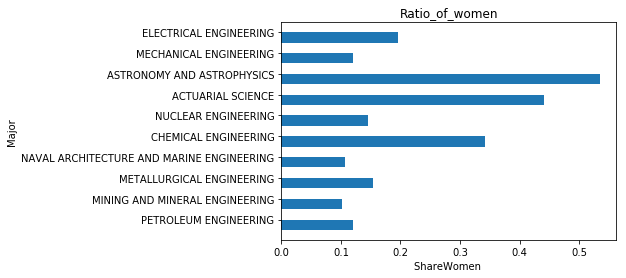

In [21]:
bar_widths = recent_grads['ShareWomen'].iloc[:10].values
bar_positions = arange(10) + 0.75
tick_positions = range(1,11)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticklabels(major_list10)
ax.set_yticks(tick_positions)
plt.ylabel("Major")
plt.xlabel("ShareWomen ")
plt.title("Ratio_of_women")
plt.show()

And now, let's make compare for all spesializations

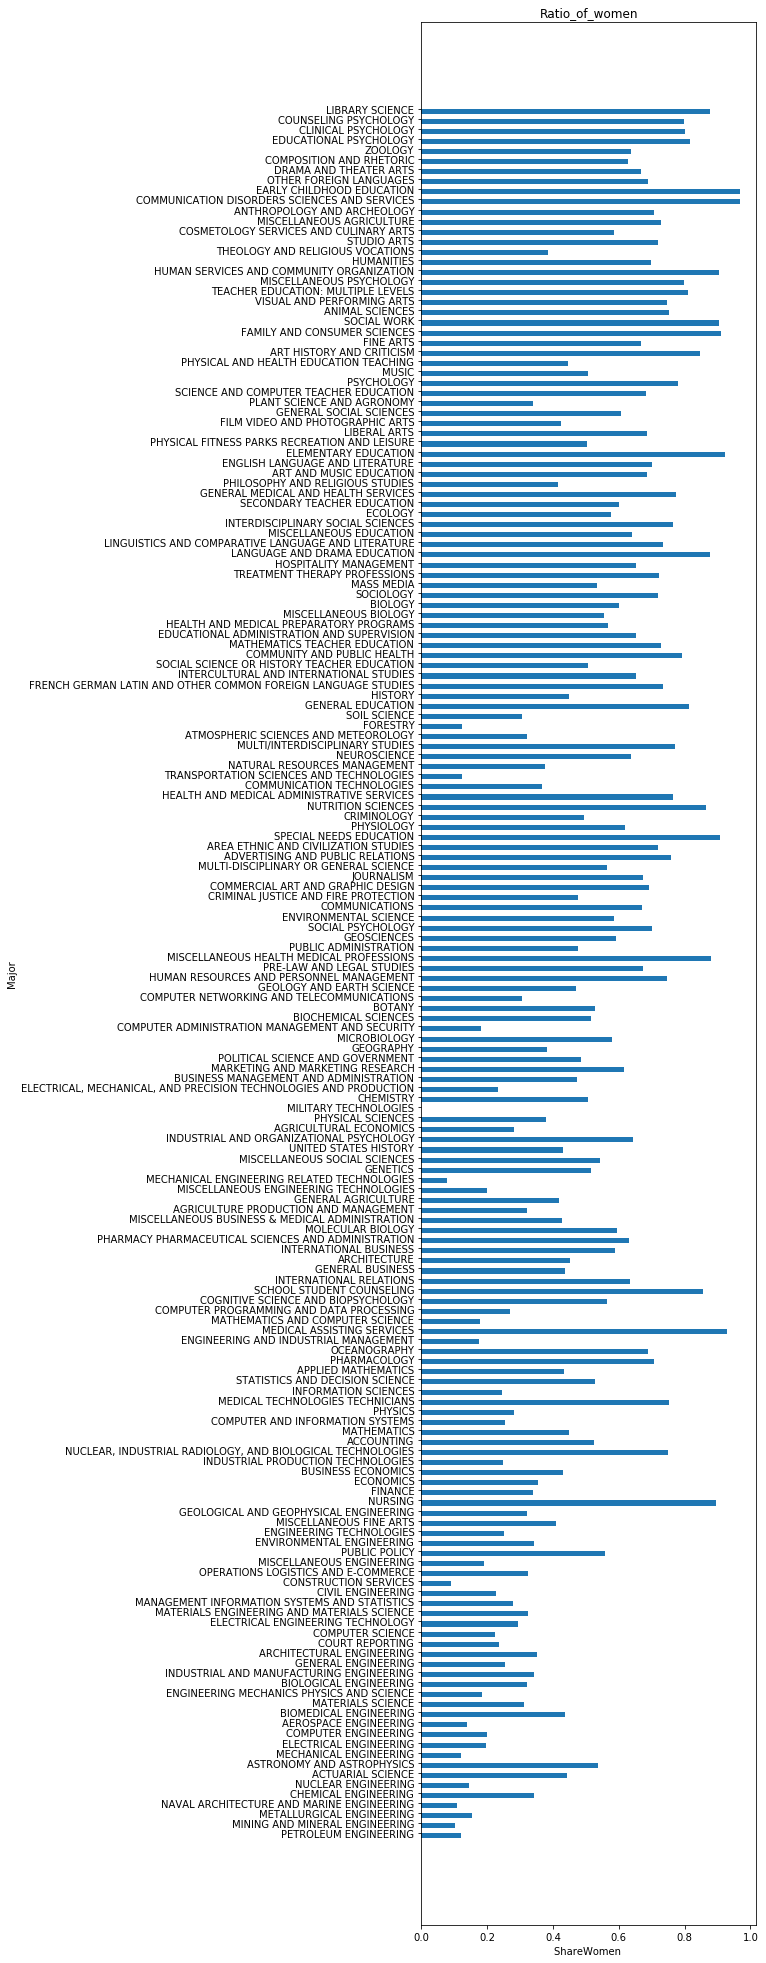

In [29]:
bar_widths = recent_grads['ShareWomen'].values
bar_positions = arange(172) + 0.75
tick_positions = range(1,173)

fig, ax = plt.subplots(figsize=(6,35))
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(major_list)
plt.ylabel("Major")
plt.xlabel("ShareWomen ")
plt.title("Ratio_of_women")
plt.show()

From bar plot above we can make next conclusions:   
- the most popular spesialisation among women are   
&emsp;early childhood education,   
&emsp;communication disorders and services,   
&emsp;medical assisting service,   
&emsp;nursing,   
&emsp;miscellaneous health medical professions,   
&emsp;special needs education,  
&emsp;elementary educations,   
&emsp;family and consumer scince,   
&emsp;social work,  
&emsp;human service and community organizations;  
- the least popular   
&emsp;miliraty technologies

Such analysis is enough for begining first approximation. But for more detalisation we can filtered our datas with some threshold value.  
**For example:**  
Ratio_of_women should be more than 85%

In [30]:
pop_for_women = recent_grads[recent_grads['ShareWomen'] > 0.85]

In [31]:
len(pop_for_women['ShareWomen'])

14

We got 14 spesialization

In [32]:
majors = pop_for_women['Major'].tolist()

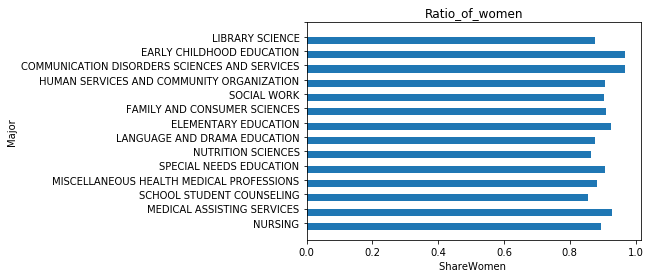

In [34]:
bar_widths = pop_for_women['ShareWomen'].values
bar_positions = arange(14) + 0.75
tick_positions = range(1,16)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(majors)
plt.ylabel("Major")
plt.xlabel("ShareWomen ")
plt.title("Ratio_of_women")
plt.show()

Let's exploring the distributions of median salaries and unemployment rate to use scatter plot.

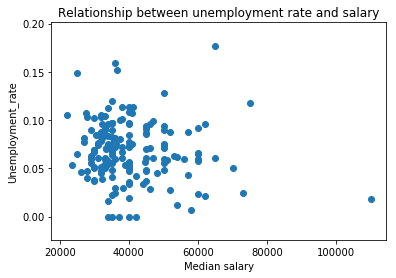

In [39]:
fig, ax = plt.subplots()
ax.scatter(recent_grads['Median'], recent_grads['Unemployment_rate'])
ax.set_xlabel("Median salary")
ax.set_ylabel("Unemployment_rate")
ax.set_title('Relationship between unemployment rate and salary')
plt.show()

As we see there is no clear dependence between median salaries and unemployment rate. But some trend can be note - the higher salary, the hagher uneployment rate. It trend can be explain:  

Sometimes, especial in the period of economical crisis, organization can reduse a number of employees and give their work function on another. In this situation  left over employees will have more work duties but at the same time higher salary

**Conclusion**:  
From the preliminary analysis it can be concluded that persons on unpopular specialzations can have salary as below average, but in most cases significantly higher (this can be seen from the dependence **Sample_size and Median**). Of course, this is due to the fact that unique specialists are always highly valued and difficult to find, plus  low competition on the labor market. However, the uniqueness of specialization can lead to the fact that it will be difficult to find a job - from the dependence of **Sample_size and Unemployment** can be seen that for non-popular specialty the unemployment rate varies widely.

We saw that the 10 lowest paying majors have more than 60 % of women. 